### Homography Matrix Example

Source: https://towardsdatascience.com/image-processing-with-python-applying-homography-for-image-warping-84cd87d2108f

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from skimage import transform
from skimage.io import imread, imshow

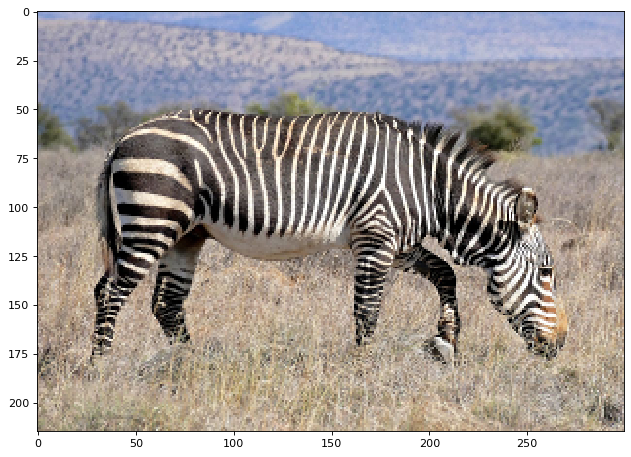

In [7]:
zebra_img = imread('zebra_small.png')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(zebra_img)